In [72]:
import numpy as np
import matplotlib.pyplot as plt

k = 5
sigma = 0.25
x_f = np.linspace(-1,1,100)
y_f = x_f*x_f - 0.5

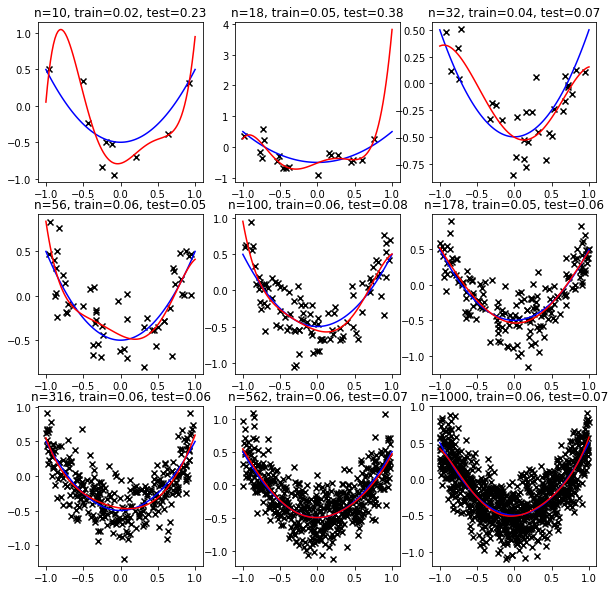

In [73]:
def data_generation(n, sigma=1):
    x = 2*np.random.rand(n)-1
    y = x*x - 0.5 + np.random.randn(n)*sigma
    return x,y

def feature(x, k=5):
    phi = np.zeros((len(x),k+1))
    for i in range(len(x)):
        for j in range(k+1):
            phi[i,j] = x[i]**j
    return phi

def poly(x, theta_hat):
    y_hat = []
    for i in range(len(x)):
        val = 0
        for j in range(len(theta_hat)):
            val += theta_hat[j]*(x[i]**j)
        y_hat.append(val)
    return y_hat

n_list = np.around(10**np.linspace(1,3,9))

plt.figure(figsize=(10,10))
for idx,value in enumerate(n_list):
    n = int(value)
    n_test = 100
    x,y = data_generation(n,sigma)
    x_test,y_test = data_generation(n_test,sigma)
    phi = feature(x)
    theta_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(phi.T,phi)),phi.T),y)
    y_hat = poly(x_f, theta_hat)
    train_error = np.linalg.norm(y-np.matmul(phi,theta_hat))**2/n
    phi_test = feature(x_test)
    test_error = np.linalg.norm(y_test-np.matmul(phi_test,theta_hat))**2/n_test

    plt.subplot(330+idx+1)
    plt.scatter(x,y,marker='x',color='k')
    plt.plot(x_f,y_f,'b')
    plt.plot(x_f,y_hat,'r')
    plt.title('n={}, train={:.2f}, test={:.2f}'.format(n,train_error,test_error))

plt.show()

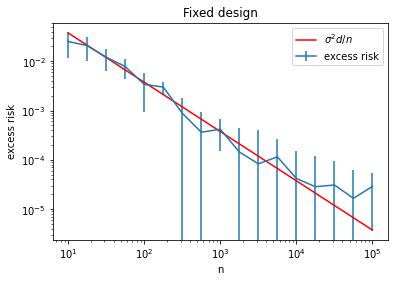

In [82]:
logn_list = np.linspace(1,5,17)
n_list = 10**logn_list
trials = 10

fixed_error = np.zeros((17,trials))
random_error = np.zeros((17,trials))

def fixed_generation(x_input, n, sigma=1):
    x = np.zeros(n)
    for i in range(n):
        x[i] = x_input[np.random.randint(len(x_input))]
    y = x*x - 0.5 + np.random.randn(n)*sigma
    return x,y

for i,value in enumerate(n_list):
    n = int(value)
    n_test = 50*n
    for j in range(trials):
        x,y = data_generation(n,sigma)
        x_fixed, y_fixed = fixed_generation(x,n_test,sigma)
        x_test,y_test = data_generation(n_test,sigma)
        phi = feature(x)
        theta_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(phi.T,phi)),phi.T),y)
        phi_fixed = feature(x_fixed)
        fixed_error[i,j] = np.linalg.norm(y_fixed-np.matmul(phi_fixed,theta_hat))**2/n_test
        phi_test = feature(x_test)
        random_error[i,j] = np.linalg.norm(y_test-np.matmul(phi_test,theta_hat))**2/n_test

fixed_mean = fixed_error.mean(axis=1)-0.06249
fixed_std = fixed_error.std(axis=1)
random_mean = random_error.mean(axis=1)-0.0623
random_std = random_error.std(axis=1)

theory_value = sigma**2 * (k+1) / n_list
plt.plot(n_list, theory_value,'r', label='$\sigma^2 d/n$')
plt.errorbar(n_list, fixed_mean, fixed_std, label='excess risk')
plt.xscale("log", nonposx='clip')
# plt.xticks(np.arange(len(logn_list)), logn_list)
plt.yscale("log", nonposy='clip')
plt.xlabel('n')
plt.ylabel('excess risk')
plt.title('Fixed design')
plt.legend()